In [30]:
import warnings
warnings.filterwarnings('ignore') # warning 출력 x

In [31]:
import pandas as pd

lst = [['권범윤', 19, '화학', '컴공', '회장'], ['이민혜', 20, '사회', '경영', '부회장'],
       ['신동현', 18, '컴공', '?', '교육팀장'], ['김민서', 19, '신방', '?', '교육팀원'],
       ['김유진', 20, '정외', '경제', '교육팀원'], ['임채홍', 21, '경영', '?', '교육팀원']]

df = pd.DataFrame(lst, columns = ['이름','학번','전공','복수전공','역할'])
df = df.set_index('이름') #이름 열을 인덱스로

df

,학번,전공,복수전공,역할
이름,,,,
권범윤,19,화학,컴공,회장
이민혜,20,사회,경영,부회장
신동현,18,컴공,?,교육팀장
김민서,19,신방,?,교육팀원
김유진,20,정외,경제,교육팀원
임채홍,21,경영,?,교육팀원


# 조건
인사이트 20학번 찾기

In [32]:
df.loc[df['학번'] == 20]
#df[df['학번']==20] 와 같음. loc은 슬라이싱에 유용

,학번,전공,복수전공,역할
이름,,,,
이민혜,20,사회,경영,부회장
김유진,20,정외,경제,교육팀원


20학번 and 교육팀원 찾기

In [33]:
df.loc[(df['학번'] == 20) & (df['역할'] == '교육팀원')]

,학번,전공,복수전공,역할
이름,,,,
김유진,20,정외,경제,교육팀원


20학번이 아니거나 교육팀원이 아닌 회원

In [34]:
df.loc[~((df['학번'] == 20) & (df['역할'] == '교육팀원'))]

,학번,전공,복수전공,역할
이름,,,,
권범윤,19,화학,컴공,회장
이민혜,20,사회,경영,부회장
신동현,18,컴공,?,교육팀장
김민서,19,신방,?,교육팀원
임채홍,21,경영,?,교육팀원


# 실습 1
전공이 경영이고, 역할이 교육팀원인 사람을 추출해주세요

아래와 같은 결과가 나오면 됩니다!

In [35]:
df.loc[(df["전공"]=='경영')&(df['역할']=="교육팀원")]

,학번,전공,복수전공,역할
이름,,,,
임채홍,21,경영,?,교육팀원


# Index 
현재 조건문을 통해 추출한 데이터는 'DataFrmae' 형식이다. 즉, 여러가지 정보가 들어가 있다. 만약 이 정보들을 <span style='color:red'>대표할 수 있는 값</span>으로 데이터 프레임을 다룬다면 조금 더 빠르지 않을까?<br>->Index를 사용해부자!

## 추출

In [36]:
idx = df[df["복수전공"] == '경영'].index
idx

Index(['이민혜'], dtype='object', name='이름')

추출한 인덱스를 갖는 데이터프레임 보기

In [37]:
df.loc[idx,]

,학번,전공,복수전공,역할
이름,,,,
이민혜,20,사회,경영,부회장


# 수정
### sort

In [38]:
df

,학번,전공,복수전공,역할
이름,,,,
권범윤,19,화학,컴공,회장
이민혜,20,사회,경영,부회장
신동현,18,컴공,?,교육팀장
김민서,19,신방,?,교육팀원
김유진,20,정외,경제,교육팀원
임채홍,21,경영,?,교육팀원


by=column을 기준으로 오름차순 정렬

In [39]:
df.sort_values(by = '학번')

,학번,전공,복수전공,역할
이름,,,,
신동현,18,컴공,?,교육팀장
권범윤,19,화학,컴공,회장
김민서,19,신방,?,교육팀원
이민혜,20,사회,경영,부회장
김유진,20,정외,경제,교육팀원
임채홍,21,경영,?,교육팀원


ascending = False를 주면 내림차순으로 진행

In [40]:
df.sort_values(by = '학번', ascending = False)

,학번,전공,복수전공,역할
이름,,,,
임채홍,21,경영,?,교육팀원
이민혜,20,사회,경영,부회장
김유진,20,정외,경제,교육팀원
권범윤,19,화학,컴공,회장
김민서,19,신방,?,교육팀원
신동현,18,컴공,?,교육팀장


### rename

In [41]:
df.rename(index = {'권범윤':'회장', '이민혜':'부회장'}, inplace = True)
df

,학번,전공,복수전공,역할
이름,,,,
회장,19,화학,컴공,회장
부회장,20,사회,경영,부회장
신동현,18,컴공,?,교육팀장
김민서,19,신방,?,교육팀원
김유진,20,정외,경제,교육팀원
임채홍,21,경영,?,교육팀원


### reset_index(drop = True, inplace = False)

In [42]:
df = df.reset_index()
df  # 이름이 다시 칼럼으로

,이름,학번,전공,복수전공,역할
0,회장,19,화학,컴공,회장
1,부회장,20,사회,경영,부회장
2,신동현,18,컴공,?,교육팀장
3,김민서,19,신방,?,교육팀원
4,김유진,20,정외,경제,교육팀원
5,임채홍,21,경영,?,교육팀원


In [43]:
df.reset_index(drop=True) # drop=True 를 넣지 않으면 index라는 새로운 칼럼이 또 생김

,이름,학번,전공,복수전공,역할
0,회장,19,화학,컴공,회장
1,부회장,20,사회,경영,부회장
2,신동현,18,컴공,?,교육팀장
3,김민서,19,신방,?,교육팀원
4,김유진,20,정외,경제,교육팀원
5,임채홍,21,경영,?,교육팀원


In [44]:
df.reset_index(inplace = True)
df
# inplace를 넣으면 df 자체가 바뀜. return값이 없음.

,index,이름,학번,전공,복수전공,역할
0,0,회장,19,화학,컴공,회장
1,1,부회장,20,사회,경영,부회장
2,2,신동현,18,컴공,?,교육팀장
3,3,김민서,19,신방,?,교육팀원
4,4,김유진,20,정외,경제,교육팀원
5,5,임채홍,21,경영,?,교육팀원


# 활용
:방대한 데이터를 다룰 경우 가장 빠른 함수

##### _원하는 조건을 가진 사람만을 추출하기_

In [48]:
team_edu = df[df['역할'] == '교육팀원']['이름']
df[df['이름'].isin(team_edu)]
#df['이름'].isin(team_edu)는 boolean값 반환
#이 앞에 df를 한번 더 씌움으로써 True인 값들만 datafrmae 형태로 보여줌

,index,이름,학번,전공,복수전공,역할
3,3,김민서,19,신방,?,교육팀원
4,4,김유진,20,정외,경제,교육팀원
5,5,임채홍,21,경영,?,교육팀원


In [49]:
business = df[df['전공'] == '경영']['이름']
business

5    임채홍
Name: 이름, dtype: object

In [51]:
df[df['이름'].isin(business)]
#business에 이름을 가지고 있는 사람을 출력

,index,이름,학번,전공,복수전공,역할
5,5,임채홍,21,경영,?,교육팀원


##### 원하는 학번을 가진 학번을 추출하기

In [52]:
number = df[df['역할'] == '교육팀원']['학번']
number

3    19
4    20
5    21
Name: 학번, dtype: int64

In [53]:
df[df['학번'].isin(number)]

,index,이름,학번,전공,복수전공,역할
0,0,회장,19,화학,컴공,회장
1,1,부회장,20,사회,경영,부회장
3,3,김민서,19,신방,?,교육팀원
4,4,김유진,20,정외,경제,교육팀원
5,5,임채홍,21,경영,?,교육팀원


##### 위의 두 조건을 모두 만족하는 데이터 보기

In [54]:
df[(df['이름'].isin(business)) & (df['학번'].isin(number))]

,index,이름,학번,전공,복수전공,역할
5,5,임채홍,21,경영,?,교육팀원


### df.shift
데이터 밀기
df.shift(period = 1)
데이터 당기기
df.shift(period = -1)

period에 넣은 값만큼 행이 밀림

In [57]:
display(df.shift(1))

,index,이름,학번,전공,복수전공,역할
0,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,회장,19.0,화학,컴공,회장
2,1.0,부회장,20.0,사회,경영,부회장
3,2.0,신동현,18.0,컴공,?,교육팀장
4,3.0,김민서,19.0,신방,?,교육팀원
5,4.0,김유진,20.0,정외,경제,교육팀원


##### 한 행이 밀려 새로 만들어진 new_df와 기존 df의 비교

In [58]:
new_df = (df == df.shift(1))
new_df

,index,이름,학번,전공,복수전공,역할
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,True,False
4,False,False,False,False,False,True
5,False,False,False,False,False,True


In [59]:
idx = new_df[new_df['역할'] == True].index
df.loc[idx]

,index,이름,학번,전공,복수전공,역할
4,4,김유진,20,정외,경제,교육팀원
5,5,임채홍,21,경영,?,교육팀원


# 실습2
isin을 활용하여 학번이 20이고, 복수전공이 경제인 사람을 추출하라

아래와 같은 결과가 나오면 됩니다!

In [60]:
number = df[df['학번'] == 20]['이름']
eco = df[df['복수전공'] == '경제']['이름']

df[(df['이름'].isin(number)) & (df['이름'].isin(eco))]

,index,이름,학번,전공,복수전공,역할
4,4,김유진,20,정외,경제,교육팀원


# DataFrame 병합 심화

In [27]:
info_dict = {
    '닉네임' : ['권대통령', '부통령 이민혜', '신동현', '김민앉아', '김유진스의하입뽀이요', '임채레드'],
    '학번' : [19, 20, 18, 19, 20, 21],
    '나이' : [24, 23, 26, 24, 23, 22]
}
info_df = pd.DataFrame(info_dict)
info_df

,닉네임,학번,나이
0,권대통령,19,24
1,부통령 이민혜,20,23
2,신동현,18,26
3,김민앉아,19,24
4,김유진스의하입뽀이요,20,23
5,임채레드,21,22


## pd.concat()

: 데이터프레임을 물리적으로 이어 붙여주는 함수

In [28]:
df

,index,이름,학번,전공,복수전공,역할
0,0,회장,19,화학,컴공,회장
1,1,부회장,20,사회,경영,부회장
2,2,신동현,18,컴공,?,교육팀장
3,3,김민서,19,신방,?,교육팀원
4,4,김유진,20,정외,경제,교육팀원
5,5,임채홍,21,경영,?,교육팀원


In [29]:
info_df

,닉네임,학번,나이
0,권대통령,19,24
1,부통령 이민혜,20,23
2,신동현,18,26
3,김민앉아,19,24
4,김유진스의하입뽀이요,20,23
5,임채레드,21,22


In [30]:
#default 값은 행으로 합쳐진다.
pd.concat([df, info_df]) 

,index,이름,학번,전공,복수전공,역할,닉네임,나이
0,0.0,회장,19,화학,컴공,회장,NaN,NaN
1,1.0,부회장,20,사회,경영,부회장,NaN,NaN
2,2.0,신동현,18,컴공,?,교육팀장,NaN,NaN
3,3.0,김민서,19,신방,?,교육팀원,NaN,NaN
4,4.0,김유진,20,정외,경제,교육팀원,NaN,NaN
5,5.0,임채홍,21,경영,?,교육팀원,NaN,NaN
0,NaN,NaN,19,NaN,NaN,NaN,권대통령,24.0
1,NaN,NaN,20,NaN,NaN,NaN,부통령 이민혜,23.0
2,NaN,NaN,18,NaN,NaN,NaN,신동현,26.0
3,NaN,NaN,19,NaN,NaN,NaN,김민앉아,24.0


→ default 값으로 <b>`axis = 0`</b>이 적용되므로 행 방향(위아래)으로 두 데이터프레임을 이어붙인다.<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;그런데, 기존 `df`에는 나이 컬럼이 없고, `info_df`에는 전공, 복수전공, 역할 컬럼이 없으므로 <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`NaN` 값이 채워진 것을 알 수 있다.

In [31]:
pd.concat([df, info_df], axis = 1)

,index,이름,학번,전공,복수전공,역할,닉네임,학번,나이
0,0,회장,19,화학,컴공,회장,권대통령,19,24
1,1,부회장,20,사회,경영,부회장,부통령 이민혜,20,23
2,2,신동현,18,컴공,?,교육팀장,신동현,18,26
3,3,김민서,19,신방,?,교육팀원,김민앉아,19,24
4,4,김유진,20,정외,경제,교육팀원,김유진스의하입뽀이요,20,23
5,5,임채홍,21,경영,?,교육팀원,임채레드,21,22


> 단순히 이어붙이는 방식이기 때문에 적절하게 이어지지 않는 문제가 발생한다. <br>
> `pd.concat()`은 데이터의 구조가 같은 경우에만 유용하게 사용될 수 있다.<br>
> 위의 문제를 해결하기 위해서는?<br>

## pd.merge()

: 두 데이터프레임을 각 데이터에 존재하는 고유값(key)을 기준으로 병합할때 사용! \
pd.merge의 default는 다음과 같습니다.

```python
pd.merge(df_left, df_right, how='inner', on=None)
```

In [32]:
# df와 info_df의 교집합을 출력

pd.merge(df, info_df, how = 'inner', left_on = '이름', right_on = '닉네임')  

,index,이름,학번_x,전공,복수전공,역할,닉네임,학번_y,나이
0,2,신동현,18,컴공,?,교육팀장,신동현,18,26


In [33]:
# 모든 데이터 출력, 어느 한쪽에라도 없는 데이터가 있는 경우 NaN값이 지정됨
pd.merge(df, info_df, how = 'outer', left_on = '이름', right_on = '닉네임')

,index,이름,학번_x,전공,복수전공,역할,닉네임,학번_y,나이
0,0.0,회장,19.0,화학,컴공,회장,NaN,NaN,NaN
1,1.0,부회장,20.0,사회,경영,부회장,NaN,NaN,NaN
2,2.0,신동현,18.0,컴공,?,교육팀장,신동현,18.0,26.0
3,3.0,김민서,19.0,신방,?,교육팀원,NaN,NaN,NaN
4,4.0,김유진,20.0,정외,경제,교육팀원,NaN,NaN,NaN
5,5.0,임채홍,21.0,경영,?,교육팀원,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,권대통령,19.0,24.0
7,NaN,NaN,NaN,NaN,NaN,NaN,부통령 이민혜,20.0,23.0
8,NaN,NaN,NaN,NaN,NaN,NaN,김민앉아,19.0,24.0
9,NaN,NaN,NaN,NaN,NaN,NaN,김유진스의하입뽀이요,20.0,23.0


In [34]:
# info_df에는 없지만 df에 있는 데이터도 출력

pd.merge(df, info_df, how = 'left', left_on = '이름', right_on = '닉네임')

,index,이름,학번_x,전공,복수전공,역할,닉네임,학번_y,나이
0,0,회장,19,화학,컴공,회장,NaN,NaN,NaN
1,1,부회장,20,사회,경영,부회장,NaN,NaN,NaN
2,2,신동현,18,컴공,?,교육팀장,신동현,18.0,26.0
3,3,김민서,19,신방,?,교육팀원,NaN,NaN,NaN
4,4,김유진,20,정외,경제,교육팀원,NaN,NaN,NaN
5,5,임채홍,21,경영,?,교육팀원,NaN,NaN,NaN


df와 info_df를 '이름'과 '학번'을 기준으로 Right Outer Join 하기

In [35]:
pd.merge(df, info_df, how = "right", on="학번")

,index,이름,학번,전공,복수전공,역할,닉네임,나이
0,0,회장,19,화학,컴공,회장,권대통령,24
1,3,김민서,19,신방,?,교육팀원,권대통령,24
2,1,부회장,20,사회,경영,부회장,부통령 이민혜,23
3,4,김유진,20,정외,경제,교육팀원,부통령 이민혜,23
4,2,신동현,18,컴공,?,교육팀장,신동현,26
5,0,회장,19,화학,컴공,회장,김민앉아,24
6,3,김민서,19,신방,?,교육팀원,김민앉아,24
7,1,부회장,20,사회,경영,부회장,김유진스의하입뽀이요,23
8,4,김유진,20,정외,경제,교육팀원,김유진스의하입뽀이요,23
9,5,임채홍,21,경영,?,교육팀원,임채레드,22


In [36]:
# 아래와 같은 결과가 나오면 됩니다!
pd.merge(df, info_df, how = "right", left_on = ["이름","학번"], right_on=["닉네임","학번"])

,index,이름,학번,전공,복수전공,역할,닉네임,나이
0,NaN,NaN,19,NaN,NaN,NaN,권대통령,24
1,NaN,NaN,20,NaN,NaN,NaN,부통령 이민혜,23
2,2.0,신동현,18,컴공,?,교육팀장,신동현,26
3,NaN,NaN,19,NaN,NaN,NaN,김민앉아,24
4,NaN,NaN,20,NaN,NaN,NaN,김유진스의하입뽀이요,23
5,NaN,NaN,21,NaN,NaN,NaN,임채레드,22


# DataFrame 그룹핑 심화

In [37]:
score_dict = {
    '이름' : ['김하나', '김하나', '김하나', '김승현', '김승현', '김승현', '이유선', '이유선', '이유선', 
            '최진호', '최진호', '최진호', '나하영', '나하영', '나하영', '박세훈', '박세훈', '박세훈', '이재윤','이재윤','이재윤'
           ,'정희수','정희수','정희수'],
    '학번' : [19, 19, 19, 22, 22, 22, 21, 21, 21, 19, 19, 19, 19, 19, 19, 18, 18, 18, 19, 19, 19, 21,21,21],
    '과목' : ['빅데이터학', '통계자료분석', '계량경제학', '빅데이터학', '통계자료분석', 'Data&AI', '빅데이터학', '통계자료분석', 'Data&AI',
           '통계자료분석', 'Data&AI', '계량경제학', '빅데이터학', '통계자료분석', '계량경제학', '빅데이터학', 'Data&AI', '계량경제학', "빅데이터학", "통계자료분석", "Data&AI", "자료구조", "빅데이터학", "Data&AI"],
    '중간고사' : [50, 60, 95, 70, 55, 85, 75, 60, 80, 85, 45, 90, 70, 65, 90, 50, 80, 40, 50, 65, 75,80,85,90],
    '기말고사' : [45, 75, 100, 80, 55, 90, 85, 65, 95, 75, 50, 95, 70, 70, 100, 55, 95, 45, 80, 75, 65,75,90,80],
    '분반' : [1, 2, 4, 1, 3, 2, 2, 2, 3, 1, 3, 5, 1, 1, 5, 2, 1, 5, 1, 3, 5,2,3,4]
}
score_df = pd.DataFrame(score_dict)
score_df

,이름,학번,과목,중간고사,기말고사,분반
0,김하나,19,빅데이터학,50,45,1
1,김하나,19,통계자료분석,60,75,2
2,김하나,19,계량경제학,95,100,4
3,김승현,22,빅데이터학,70,80,1
4,김승현,22,통계자료분석,55,55,3
5,김승현,22,Data&AI,85,90,2
6,이유선,21,빅데이터학,75,85,2
7,이유선,21,통계자료분석,60,65,2
8,이유선,21,Data&AI,80,95,3
9,최진호,19,통계자료분석,85,75,1


## df.group.by()

In [38]:
score_df.groupby('이름')

groupby 객체가 리턴된다! (아무것도 못함😥)<br>
→  <b>`df.groupby('컬럼명').함수()`</b> 그루핑 후 추가적인 함수(집계함수)를 사용하여 원하는 값을 조회할 수 있음

In [39]:
score_df.groupby('이름')["중간고사"].mean()

이름
김승현    70.000000
김하나    68.333333
나하영    75.000000
박세훈    56.666667
이유선    71.666667
이재윤    63.333333
정희수    85.000000
최진호    73.333333
Name: 중간고사, dtype: float64

### 개수: count()

In [40]:
# 과목별 수강 인원
# Series

score_df.groupby('과목')['이름'].count()  #과목별로 얼마나 들었는가

과목
Data&AI    6
계량경제학      4
빅데이터학      7
자료구조       1
통계자료분석     6
Name: 이름, dtype: int64

In [41]:
# 과목별 수강 인원
# DataFrame

score_df.groupby('과목')['이름'].count().to_frame()    # 더 예쁘게

,이름
과목,
Data&AI,6
계량경제학,4
빅데이터학,7
자료구조,1
통계자료분석,6


### 합계 sum()

In [42]:
# 학생별 시험 성적 합계

display(score_df.groupby('이름')[['중간고사', '기말고사']].sum())
#중간고사 성적을 기준으로 내림차순
display(score_df.groupby('이름')[['중간고사', '기말고사']].sum().sort_values(by = '중간고사', ascending = False))

,중간고사,기말고사
이름,,
김승현,210,225
김하나,205,220
나하영,225,240
박세훈,170,195
이유선,215,245
이재윤,190,220
정희수,255,245
최진호,220,220


,중간고사,기말고사
이름,,
정희수,255,245
나하영,225,240
최진호,220,220
이유선,215,245
김승현,210,225
김하나,205,220
이재윤,190,220
박세훈,170,195


### 최대/최소: max() min()

In [43]:
# 과목별 중간고사 성적 최대값

score_df.groupby('과목')[['중간고사']].max()

,중간고사
과목,
Data&AI,90
계량경제학,95
빅데이터학,85
자료구조,80
통계자료분석,85


In [44]:
# 과목별 기말고사 성적 최소값

score_df.groupby('과목')[['기말고사']].min()

,기말고사
과목,
Data&AI,50
계량경제학,45
빅데이터학,45
자료구조,75
통계자료분석,55


### 평균/중앙값: mean() median()

In [45]:
score_df.groupby('과목')[['중간고사', '기말고사']].mean()

,중간고사,기말고사
과목,,
Data&AI,75.833333,79.166667
계량경제학,78.750000,85.000000
빅데이터학,64.285714,72.142857
자료구조,80.000000,75.000000
통계자료분석,65.000000,69.166667


In [46]:
score_df.groupby('과목')[['중간고사', '기말고사']].median()

,중간고사,기말고사
과목,,
Data&AI,80.0,85.0
계량경제학,90.0,97.5
빅데이터학,70.0,80.0
자료구조,80.0,75.0
통계자료분석,62.5,72.5


이 외에도 표준편차 `std()`, 분산 `var()`, 분위수 `quantile()` 등의 집계함수가 있습니다.

## 여러 개의 컬럼을 기준으로 그룹핑하려면? (Multi Index)
`df.groupby(['컬럼명1','컬럼명2'])`

In [47]:
score_df.groupby(['과목', '분반'])[['중간고사', '기말고사']].sum()

중간고사  기말고사
과목      분반            
Data&AI 1     80    95
        2     85    90
        3    125   145
        4     90    80
        5     75    65
계량경제학   4     95   100
        5    220   240
빅데이터학   1    240   275
        2    125   140
        3     85    90
자료구조    2     80    75
통계자료분석  1    150   145
        2    120   140
        3    120   130

## 여러 개의 집계함수를 사용하려면?
`df.groupby('컬럼명').agg([함수1, 함수2, ...])`

In [48]:
score_df.groupby('과목')[['중간고사', '기말고사']].agg(['count', 'sum', 'max', 'min', 'mean', 'median'])

중간고사                                 기말고사                           \
        count  sum max min       mean median count  sum  max min       mean   
과목                                                                            
Data&AI     6  455  90  45  75.833333   80.0     6  475   95  50  79.166667   
계량경제학       4  315  95  40  78.750000   90.0     4  340  100  45  85.000000   
빅데이터학       7  450  85  50  64.285714   70.0     7  505   90  45  72.142857   
자료구조        1   80  80  80  80.000000   80.0     1   75   75  75  75.000000   
통계자료분석      6  390  85  55  65.000000   62.5     6  415   75  55  69.166667   

                
        median  
과목              
Data&AI   85.0  
계량경제학     97.5  
빅데이터학     80.0  
자료구조      75.0  
통계자료분석    72.5

## 집계함수 이외에 사용할 수 있는 함수의 예

In [49]:
# 학생별 수강 과목

score_df.groupby('이름')['과목'].unique().to_frame()

,과목
이름,
김승현,"[빅데이터학, 통계자료분석, Data&AI]"
김하나,"[빅데이터학, 통계자료분석, 계량경제학]"
나하영,"[빅데이터학, 통계자료분석, 계량경제학]"
박세훈,"[빅데이터학, Data&AI, 계량경제학]"
이유선,"[빅데이터학, 통계자료분석, Data&AI]"
이재윤,"[빅데이터학, 통계자료분석, Data&AI]"
정희수,"[자료구조, 빅데이터학, Data&AI]"
최진호,"[통계자료분석, Data&AI, 계량경제학]"


## 실습3
학번별 중간고사와 기말고사의 평균, 최댓값이 하나의 데이터프레임 안에 들어오도록 만드세요!

> 아래와 같은 그림이 나오게 해주세요!

In [50]:
score_df.groupby('학번')[['중간고사', '기말고사']].agg(['mean', 'max'])

중간고사           기말고사     
         mean max       mean  max
학번                               
18  56.666667  80  65.000000   95
19  70.000000  95  75.000000  100
21  78.333333  90  81.666667   95
22  70.000000  85  75.000000   90

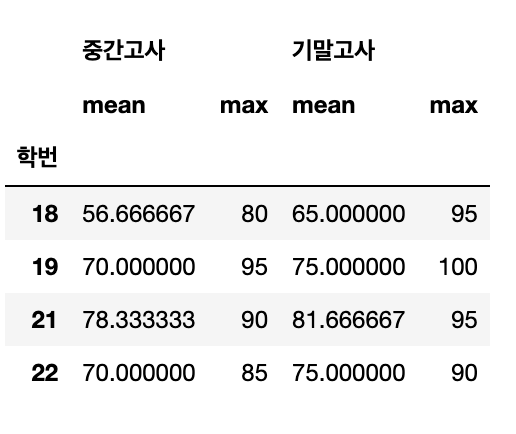

##### score_df.groupby("학번")[['중간고사','기말고사']].agg(['mean', 'max']).to_frame()
##### 프레임을 또 프레임을 씌운것..

# DataFrame 변형 심화

In [51]:
print(pd.__version__)

1.3.4


## pivot_table
- 데이터의 두 개의 컬럼을 행/열 인덱스로 써서 데이터를 재구조화한 테이블
 
 
- 엑셀의 pivot_table 기능처럼 사용
```python
pd.pivot_table(data, values=None, index=None, columns=None, aggfunc='mean', fill_value=None, dropna=True, margins=False, margins_name='All')
df.pivot_table(values=None, index=None, columns=None, aggfunc='mean', fill_value=None, dropna=True, margins=False, margins_name='All')
```
- values : 통계함수를 적용할 데이터프레임의 특정 컬럼
 
    
- index : 그룹화의 첫 번째 기준으로, 피벗테이블의 index로 가져올 데이터프레임의 특정 컬럼(두 개 이상이면 list로)
 
    
- columns : 그룹화의 두 번째 기준으로, 피벗테이블의 columns로 가져올 데이터프레임의 특정 컬럼(두 개 이상이면 list로)


- aggfunc : 2개의 그룹화 기준으로 values의 특정 컬럼에 적용시킬 통계함수 (default : mean)


- fill_value : NaN의 대체값


- dropna : values가 전부 NaN인 행/열의 삭제 여부


- margins : 모든 데이터를 분석한 결과(=마진)를 마지막 행/열에 붙일지 여부


- margins_name: 마진 행/열의 이름

In [52]:
# 과목과 분반으로 그룹화

score_df.pivot_table(index = ['과목', '분반']).round()

기말고사  중간고사    학번
과목      분반                   
Data&AI 1    95.0  80.0  18.0
        2    90.0  85.0  22.0
        3    72.0  62.0  20.0
        4    80.0  90.0  21.0
        5    65.0  75.0  19.0
계량경제학   4   100.0  95.0  19.0
        5    80.0  73.0  19.0
빅데이터학   1    69.0  60.0  20.0
        2    70.0  62.0  20.0
        3    90.0  85.0  21.0
자료구조    2    75.0  80.0  21.0
통계자료분석  1    72.0  75.0  19.0
        2    70.0  60.0  20.0
        3    65.0  60.0  20.0

In [53]:
# 과목과 분반으로 그룹화하고 중간고사와 기말고사의 최대값 조회 

score_df.pivot_table(index = ['과목', '분반'], values = ['중간고사', '기말고사'], aggfunc = 'max')

기말고사  중간고사
과목      분반            
Data&AI 1     95    80
        2     90    85
        3     95    80
        4     80    90
        5     65    75
계량경제학   4    100    95
        5    100    90
빅데이터학   1     80    70
        2     85    75
        3     90    85
자료구조    2     75    80
통계자료분석  1     75    85
        2     75    60
        3     75    65

In [54]:
# 과목으로 그룹화하고 분반을 구분해서 중간고사와 기말고사의 평균값 조회 

score_df.pivot_table(index = '과목', columns = '분반', values = ['중간고사', '기말고사'], aggfunc = 'mean')

기말고사                           중간고사                             
분반           1     2     3      4     5     1     2     3     4          5
과목                                                                        
Data&AI  95.00  90.0  72.5   80.0  65.0  80.0  85.0  62.5  90.0  75.000000
계량경제학      NaN   NaN   NaN  100.0  80.0   NaN   NaN   NaN  95.0  73.333333
빅데이터학    68.75  70.0  90.0    NaN   NaN  60.0  62.5  85.0   NaN        NaN
자료구조       NaN  75.0   NaN    NaN   NaN   NaN  80.0   NaN   NaN        NaN
통계자료분석   72.50  70.0  65.0    NaN   NaN  75.0  60.0  60.0   NaN        NaN

# 실습4

## 실습 4-1 -> 과제
코드를 4줄만 써서, df1을 아래 결과처럼 바꿔보세요! (데이터프레임 출력하는 줄 제외 4줄)

In [55]:
# 기존 df1
import pandas as pd
df1 = pd.DataFrame({
    'A' : [1, 2, 3, 4, 5], 'B' : [55, 45, 88, 97, 13], 'C' : [70, 60, 70, 80, 90], 
    'D' : [87, 99, 94, 24, 26], 'E' : [56, 53, 39, 83, 80], 'F' : [13, 24, 29, 78, 61]})
df1

,A,B,C,D,E,F
0,1,55,70,87,56,13
1,2,45,60,99,53,24
2,3,88,70,94,39,29
3,4,97,80,24,83,78
4,5,13,90,26,80,61


In [56]:
df2 = df1.loc[:,'B':'E'] >= 80
df2 = df2.astype(int)
df1['A'] = df1['A'] * 2
df1.loc[:,'B':'E'] = df2

#df1

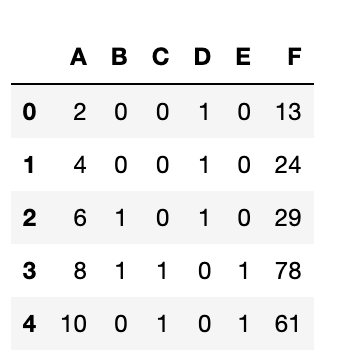

## 실습 4-2
19학번과 20학번이 아닌 학생들의 데이터프레임에서 이름을 기준으로 수강 중인 과목을 알아보기 (score_df 사용)

In [57]:
score_df2 = score_df[(score_df['학번'] != 19) & (score_df['학번'] != 20)]

score_df2.groupby('이름')['과목'].unique().to_frame()

,과목
이름,
김승현,"[빅데이터학, 통계자료분석, Data&AI]"
박세훈,"[빅데이터학, Data&AI, 계량경제학]"
이유선,"[빅데이터학, 통계자료분석, Data&AI]"
정희수,"[자료구조, 빅데이터학, Data&AI]"


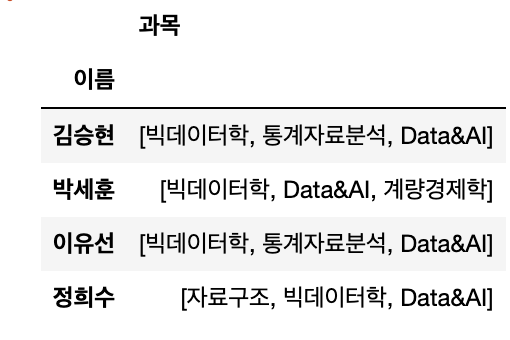

## 실습 4-3
과목별 중간고사의 count, sum, max, min, mean, median 정보를 알려주는 데이터프레임을 만들고, <br>
같은 방식으로 기말고사의 데이터프레임을 만든 뒤, 이를 병합하여 아래와 같은 결과를 도출하세요!

In [58]:
score_df.groupby('과목')['중간고사'].mean()

과목
Data&AI    75.833333
계량경제학      78.750000
빅데이터학      64.285714
자료구조       80.000000
통계자료분석     65.000000
Name: 중간고사, dtype: float64

In [59]:
score_df.groupby('과목')[['중간고사']].mean()

,중간고사
과목,
Data&AI,75.833333
계량경제학,78.750000
빅데이터학,64.285714
자료구조,80.000000
통계자료분석,65.000000


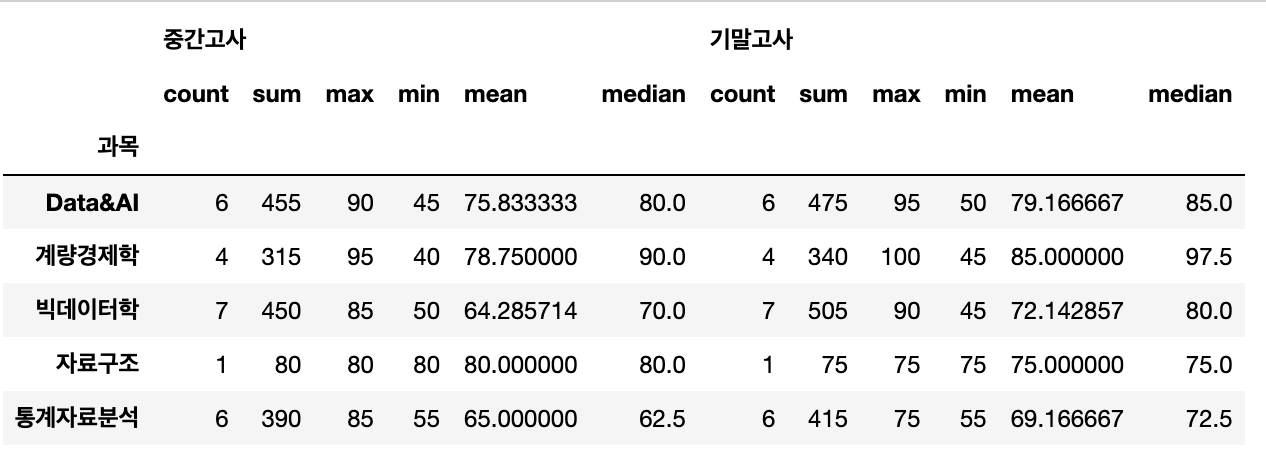

In [60]:
mid = score_df.groupby('과목')[['중간고사']].agg(['count', 'sum', 'max', 'min', 'mean', 'median'])
fin = score_df.groupby('과목')[['기말고사']].agg(['count', 'sum', 'max', 'min', 'mean', 'median'])

pd.concat([mid,fin],axis = 1)

중간고사                                 기말고사                           \
        count  sum max min       mean median count  sum  max min       mean   
과목                                                                            
Data&AI     6  455  90  45  75.833333   80.0     6  475   95  50  79.166667   
계량경제학       4  315  95  40  78.750000   90.0     4  340  100  45  85.000000   
빅데이터학       7  450  85  50  64.285714   70.0     7  505   90  45  72.142857   
자료구조        1   80  80  80  80.000000   80.0     1   75   75  75  75.000000   
통계자료분석      6  390  85  55  65.000000   62.5     6  415   75  55  69.166667   

                
        median  
과목              
Data&AI   85.0  
계량경제학     97.5  
빅데이터학     80.0  
자료구조      75.0  
통계자료분석    72.5

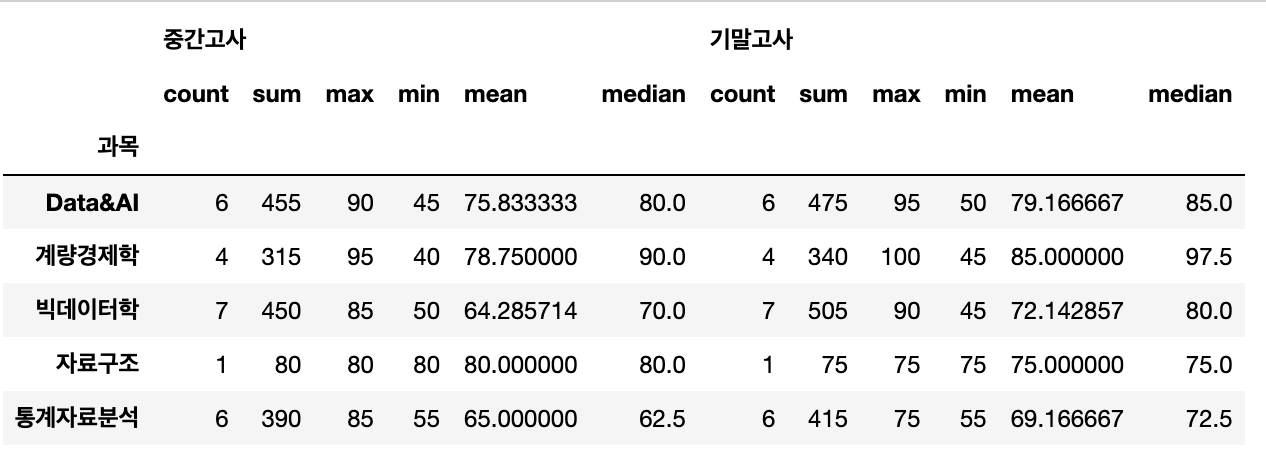